# Introduction

Latar Belakang
Pembagian segmen pelanggan (customer segmentation) adalah proses pengelompokan pelanggan berdasarkan karakteristik yang sama. Tujuannya adalah untuk memahami perilaku dan kebutuhan pelanggan secara lebih baik, sehingga perusahaan dapat mengembangkan strategi pemasaran yang lebih efektif.

Pembagian segmen pelanggan dapat dilakukan dengan berbagai metode, salah satunya adalah dengan menggunakan teknik clustering. Clustering adalah metode unsupervised learning yang digunakan untuk mengelompokkan data ke dalam kelompok-kelompok berdasarkan kesamaan karakteristik.

Dataset yang digunakan dalam proyek ini adalah Credit Card Dataset for Clustering dari Kaggle. Dataset ini berisi data perilaku penggunaan kartu kredit dari 9.000 pemegang kartu aktif selama 6 bulan terakhir Data ini memiliki 18 atribut.
Attribute Information:
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

Objektif dari proyek ini adalah untuk mengidentifikasi segmen-segmen pelanggan kartu kredit berdasarkan karakteristik perilaku penggunaan kartu kredit mereka.

Dengan memahami segmen-segmen pelanggan ini, perusahaan dapat mengembangkan strategi pemasaran yang lebih efektif untuk masing-masing segmen. Misalnya, perusahaan dapat menawarkan produk dan layanan yang lebih relevan dengan kebutuhan dan keinginan masing-masing segmen.

NAMA :Monica Belinda | KS-19

# Import Libraries

In [1]:
# Data Wrangling
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis and Modeling
from scipy.stats import gaussian_kde, zscore, chi2, f_oneway
from scipy.integrate import simps
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from pickle import dump, load

# Settings
pd.set_option("display.max.columns", None)
%matplotlib inline
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



In [2]:
import sklearn
import yellowbrick

print("scikit-learn version:", sklearn.__version__)
print("yellowbrick version:", yellowbrick.__version__)


scikit-learn version: 1.3.2
yellowbrick version: 1.5


# Data Loading

Import *CC GENERAL.csv* as *df* and lower all the features' names. The *cust_id* feature can be dropped as it is unique for every row.

In [3]:
df = pd.read_csv("CC GENERAL.csv")
df.columns = df.columns.str.lower()
df = df.drop("cust_id",axis=1)
df.head(10)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Check the shape of the dataset, which has 8,950 rows and 17 columns.

In [4]:
print(f"Number of Rows\t\t: {df.shape[0]}")
print(f"Number of Columns\t: {df.shape[1]}")

Number of Rows		: 8950
Number of Columns	: 17


# Data Cleaning

Take a look at the dataset in more detail. There are 2 features, *minimum_payments* and *credit_limit*, that contain null values.

In [5]:
pd.DataFrame({
    "type":df.dtypes.values,
    "null":df.isnull().sum().values,
    "null_percentage":df.isnull().sum().values / len(df) * 100,
    "unique":[df[i].nunique() for i in df.columns],
    "sample":[list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)

,type,null,null_percentage,unique,sample
minimum_payments,float64,313,3.497207,8636,3242.471295
credit_limit,float64,1,0.011173,205,2700.000000
balance,float64,0,0.000000,8871,3474.972612
cash_advance_frequency,float64,0,0.000000,54,0.750000
prc_full_payment,float64,0,0.000000,47,0.555556
payments,float64,0,0.000000,8711,999.607298
purchases_trx,int64,0,0.000000,173,12.000000
cash_advance_trx,int64,0,0.000000,65,45.000000
purchases_installments_frequency,float64,0,0.000000,47,0.555556
balance_frequency,float64,0,0.000000,43,0.100000


Since there's only a few null values, we can drop all rows that contain null values.

In [6]:
df = df.dropna()
df = df.reset_index(drop=True)

# Data Exploration

Calculate the Pearson correlation between every feature.

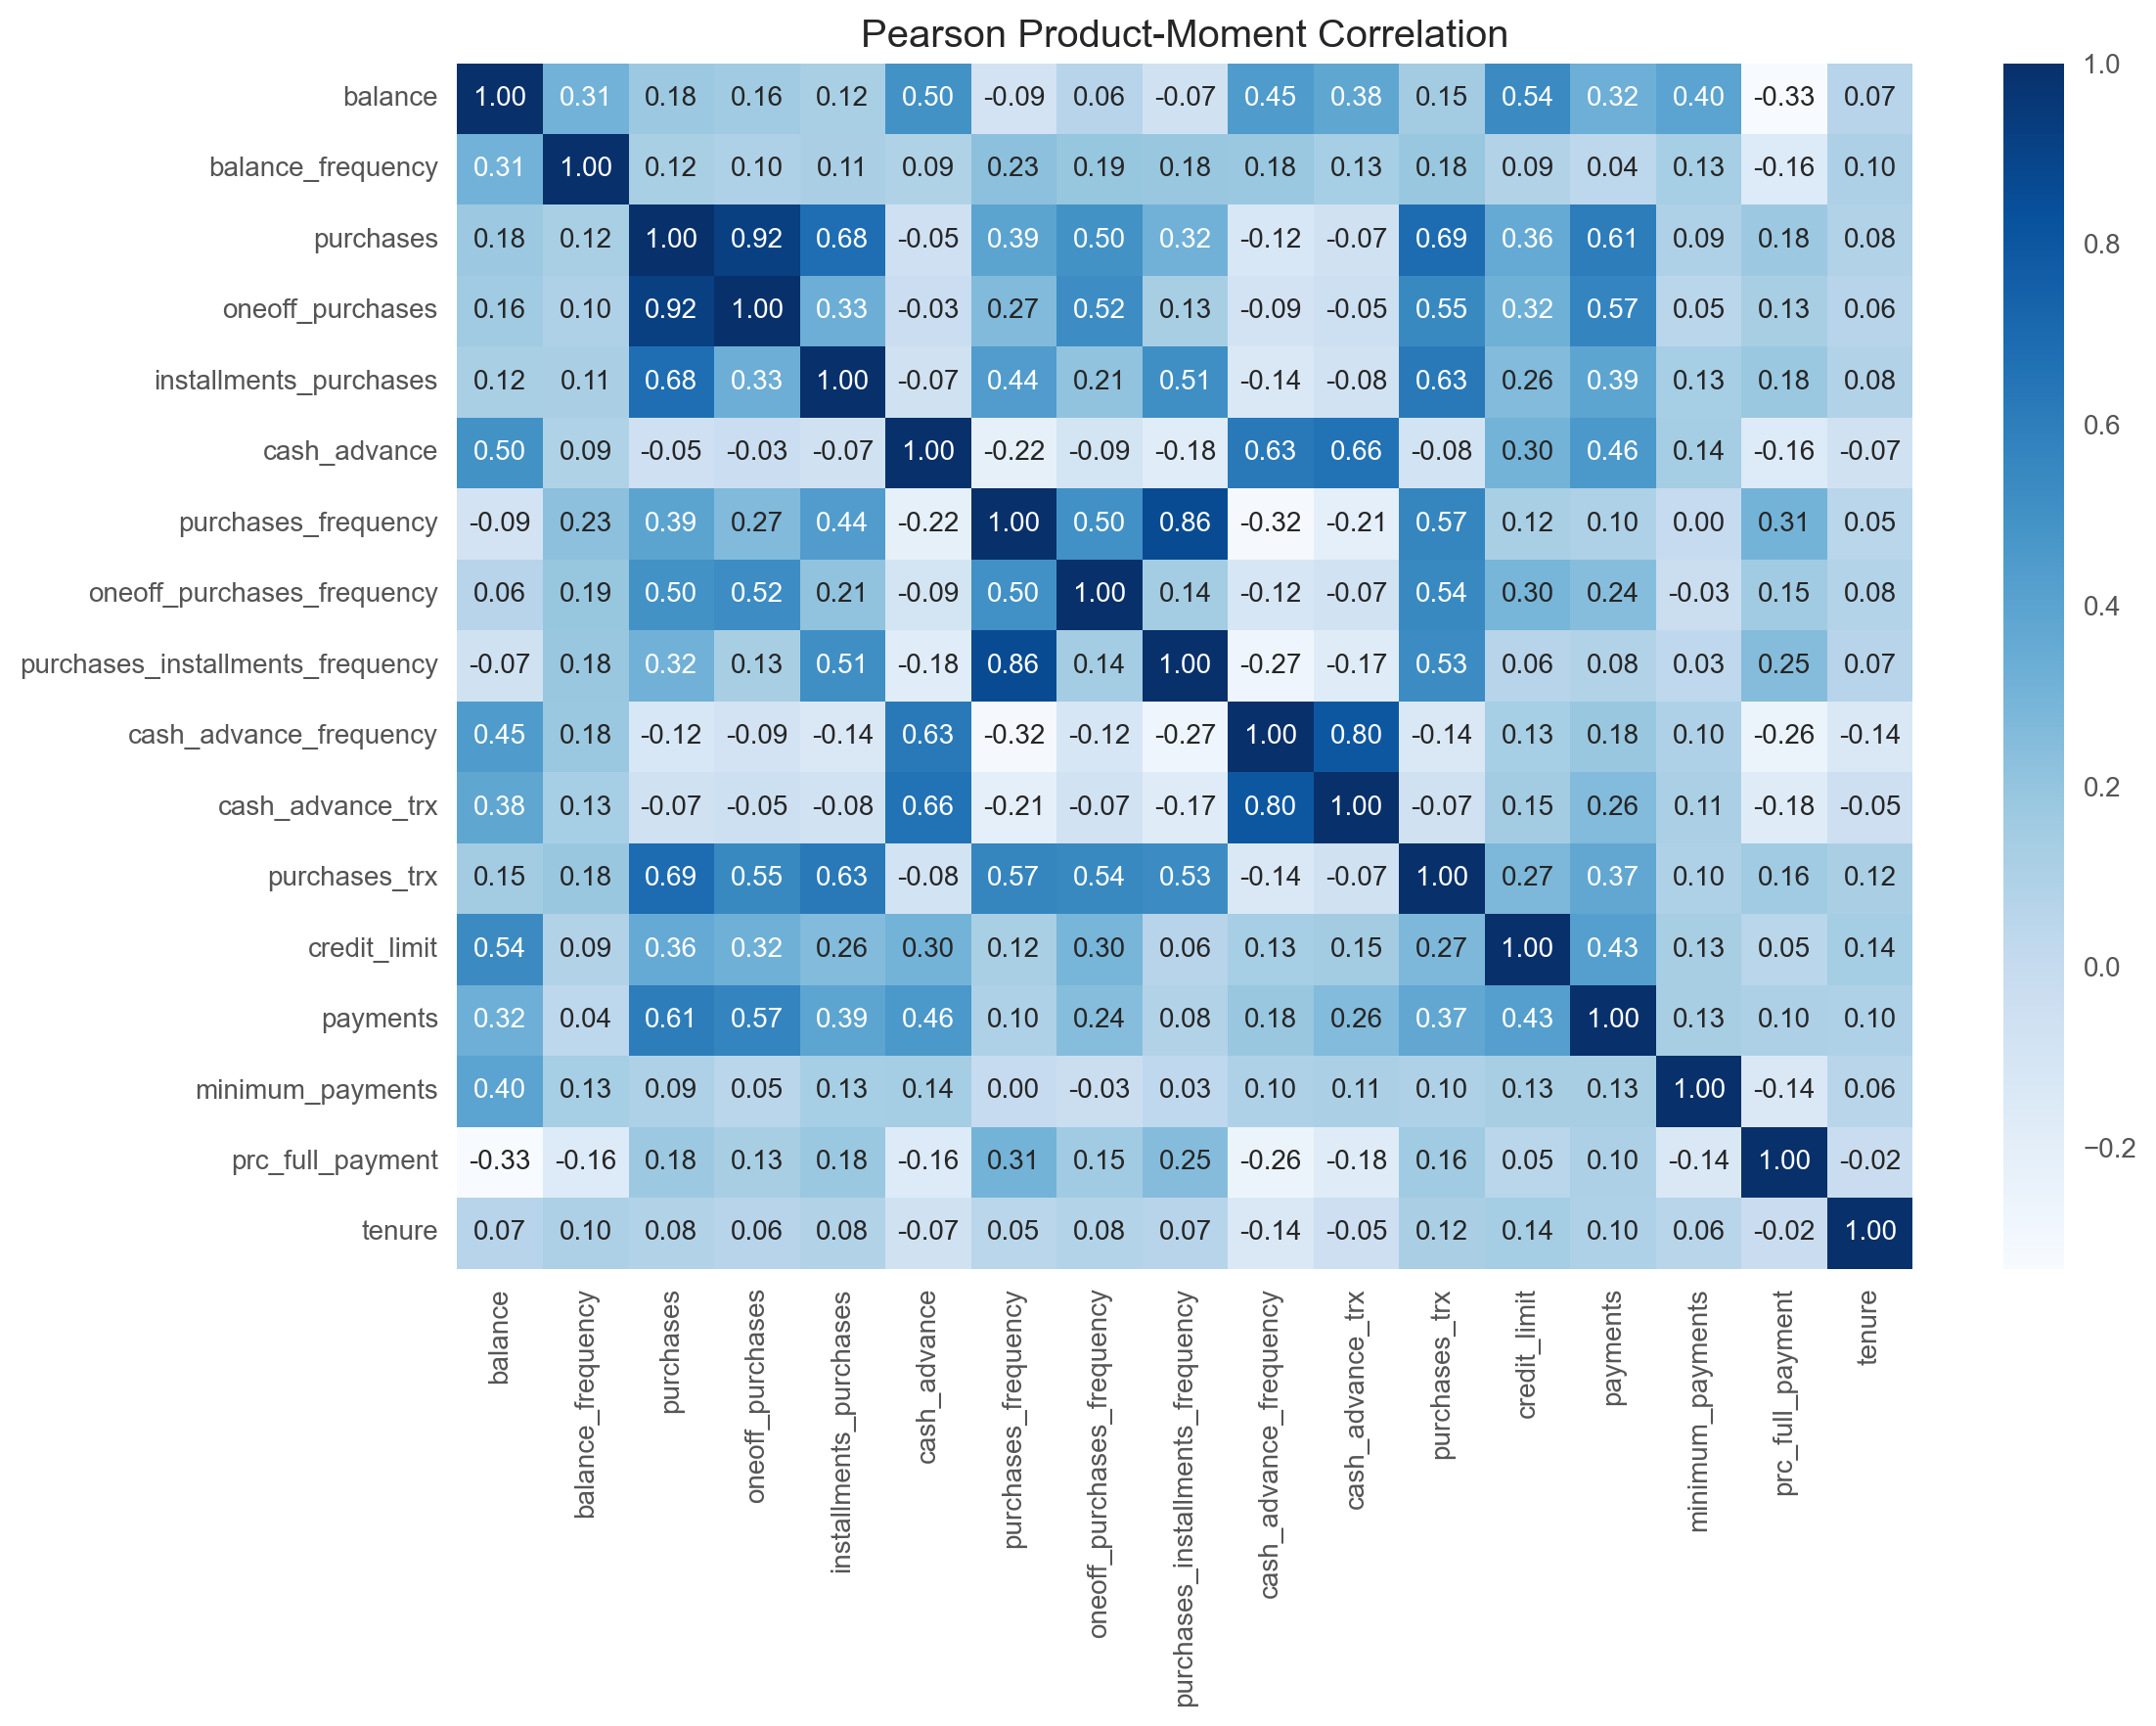

In [7]:
fig,ax = plt.subplots(figsize=(12,8),dpi=200)
sns.heatmap(ax=ax,data=df.corr(),cmap="Blues",annot=True,fmt=".2f")
ax.set_title("Pearson Product-Moment Correlation")
plt.show()

Total saldo pelanggan yang membeli paling sering (untuk menentukan ambang 0,8) menyumbang 32,49% dari total saldo semua pelanggan.

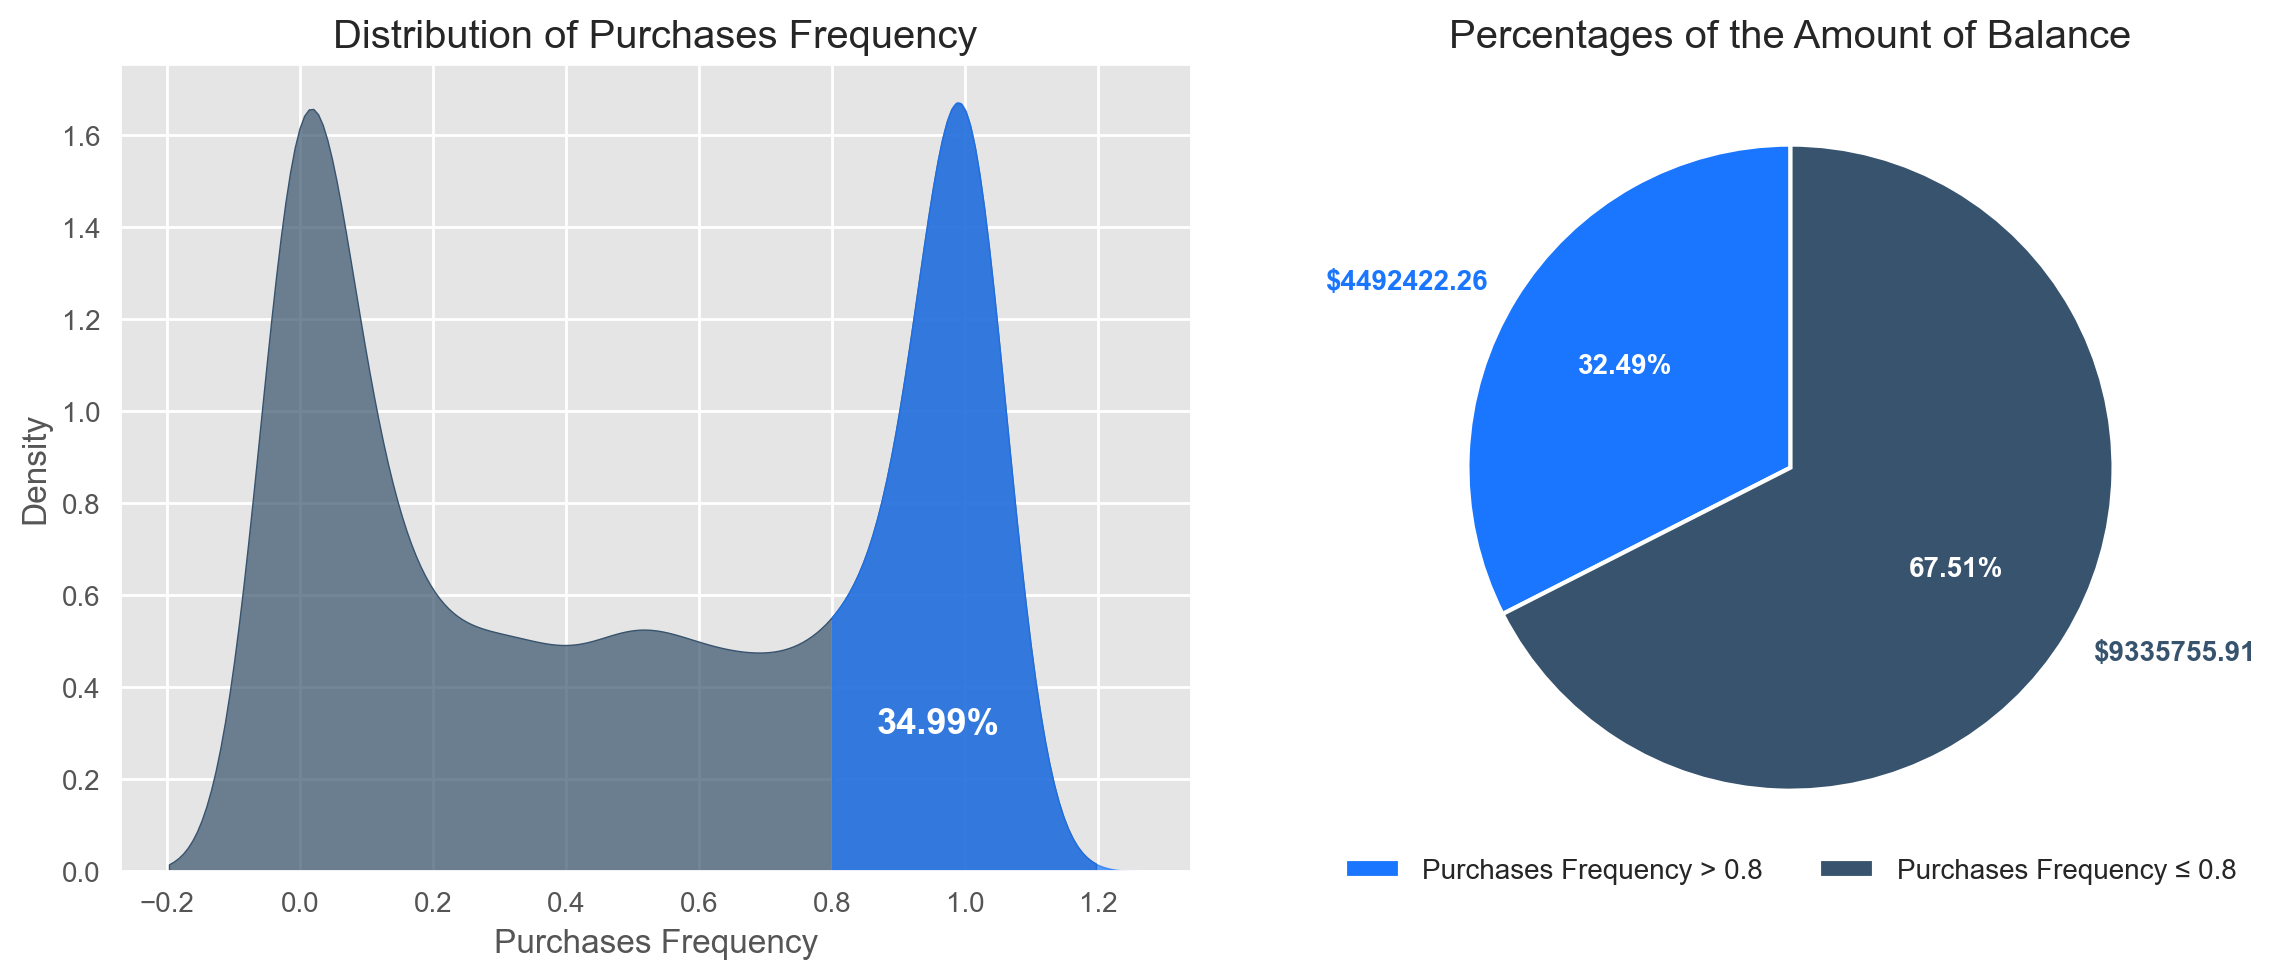

In [8]:
fig,ax = plt.subplots(1,2,figsize=(12,5),dpi=200)

kde_plot = sns.kdeplot(ax=ax[0],data=df,x="purchases_frequency",color="#37536d",fill=True,alpha=0.7)
xmin,xmax = kde_plot.get_xlim()
kde = gaussian_kde(df["purchases_frequency"])
x = np.linspace(xmin,xmax,10_000)
kde_y = kde(x)
x0,y0 = [],[]
for i,j in zip(x,kde_y):
    if i > 0.8:
        x0.append(i)
        y0.append(j)
x0,y0 = np.array(x0),np.array(y0)
area0 = round(simps(y0,x0,dx=1) * 100,0)
kde_plot.fill_between(x=x0,y1=y0,color="#1a76ff",alpha=0.7)
ax[0].text(
    x=0.96,
    y=0.3,
    horizontalalignment="center",
    s=f"{round(len(df[df['purchases_frequency'] > 0.8]) / len(df) * 100,2)}%",
    color="white",
    fontweight="bold",
    fontsize=13
)
ax[0].set_title("Distribution of Purchases Frequency")
ax[0].set_xlabel("Purchases Frequency")

patches,texts,pcts = ax[1].pie(
    [df[df["purchases_frequency"] > 0.8]["balance"].sum(),df[df["purchases_frequency"] <= 0.8]["balance"].sum()],
    labels=[f'${round(df[df["purchases_frequency"] > 0.8]["balance"].sum(),2)}',f'${round(df[df["purchases_frequency"] <= 0.8]["balance"].sum(),2)}'],
    startangle=90,
    colors=["#1a76ff","#37536d"],
    autopct="%.2f%%",
    wedgeprops={"linewidth":1.5,"edgecolor":"white"}
)
ax[1].set_title("Percentages of the Amount of Balance")
ax[1].legend(patches,["Purchases Frequency > 0.8","Purchases Frequency ≤ 0.8"],ncol=2,bbox_to_anchor=(0.5,0),loc="center")
for index,patch in enumerate(patches):
    texts[index].set_color(patch.get_facecolor())
plt.setp(pcts,color="white",fontweight="bold")
plt.setp(texts,fontweight="bold")

plt.tight_layout()
plt.show()

No matter how frequent the customers make purchases, there are only less than 10% who have paid their payments fully in each group.

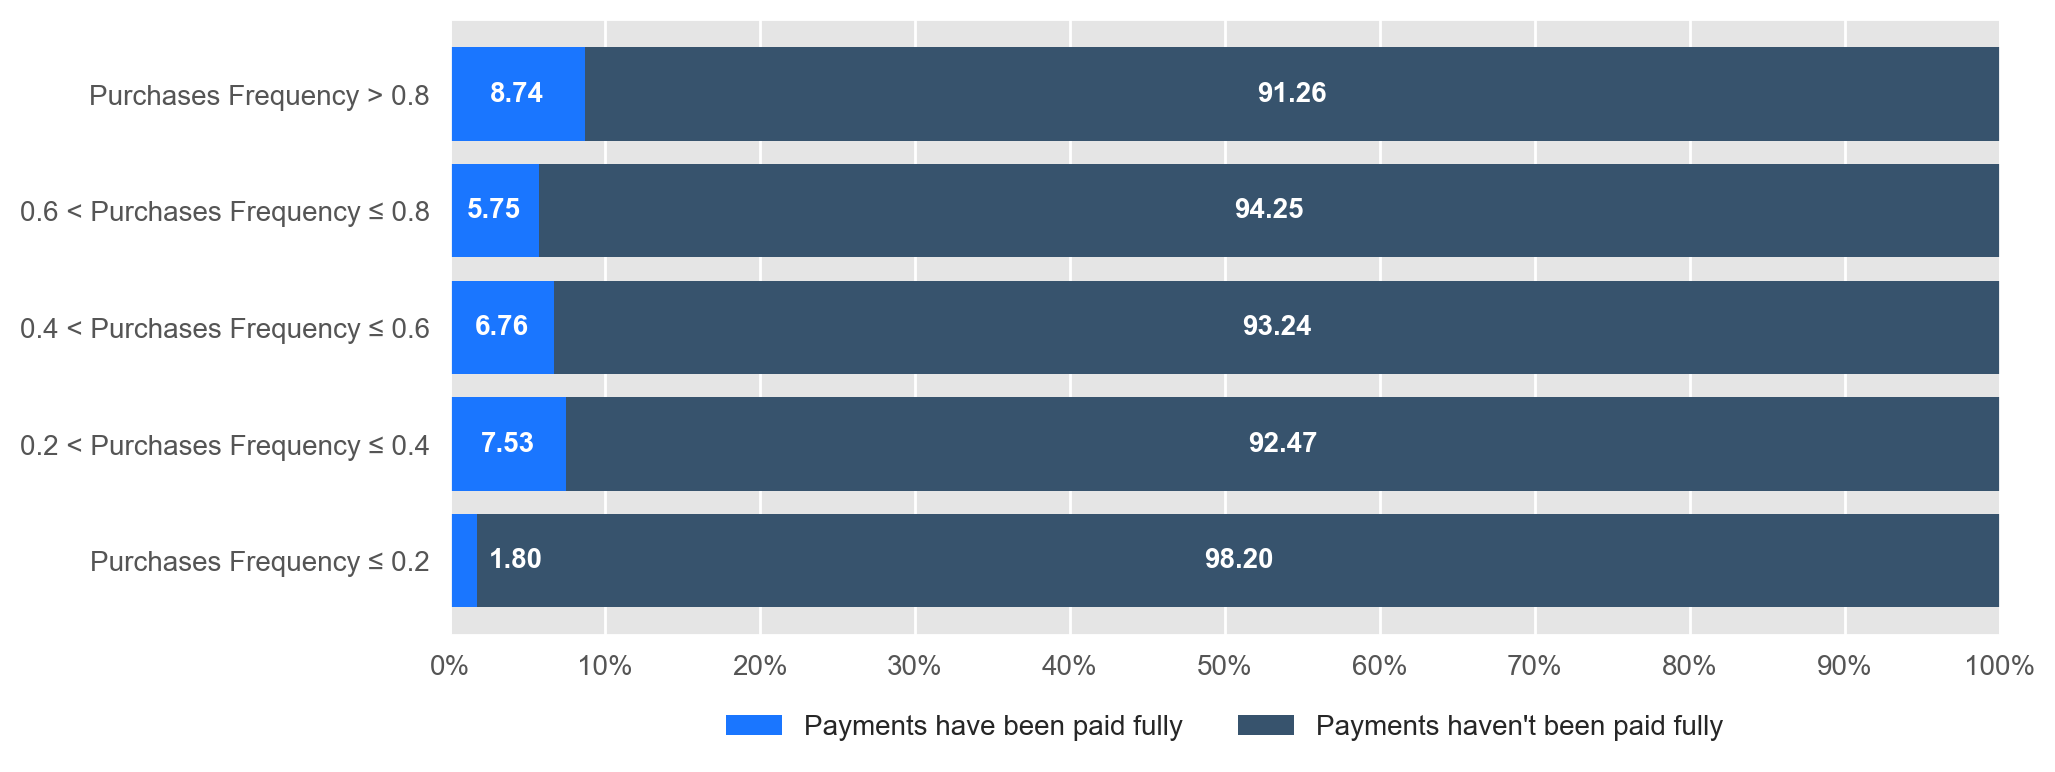

In [9]:
first = df[df["purchases_frequency"] <= 0.2]
second = df[(df["purchases_frequency"] > 0.2) & (df["purchases_frequency"] <= 0.4)]
third = df[(df["purchases_frequency"] > 0.4) & (df["purchases_frequency"] <= 0.6)]
fourth = df[(df["purchases_frequency"] > 0.6) & (df["purchases_frequency"] <= 0.8)]
fifth = df[df["purchases_frequency"] > 0.8]
labels = [
    "Purchases Frequency ≤ 0.2","0.2 < Purchases Frequency ≤ 0.4","0.4 < Purchases Frequency ≤ 0.6",
    "0.6 < Purchases Frequency ≤ 0.8","Purchases Frequency > 0.8"
]

prc_full_payment_is_1,prc_full_payment_not_1 = [],[]
for subset in [first,second,third,fourth,fifth]:
    prc_full_payment_is_1.append(len(subset[subset["prc_full_payment"] == 1]) / len(subset) * 100)
    prc_full_payment_not_1.append(len(subset[subset["prc_full_payment"] != 1]) / len(subset) * 100)

fig,ax = plt.subplots(figsize=(10,4),dpi=200)
n = 0

for label,prc_is_1,prc_not_1 in zip(labels,prc_full_payment_is_1,prc_full_payment_not_1):
    if n == 0:
        ax.barh(label,prc_is_1,color="#1a76ff",label="Payments have been paid fully")
        ax.barh(label,prc_not_1,left=prc_is_1,color="#37536d",label="Payments haven't been paid fully")
        n += 1
    else:
        ax.barh(label,prc_is_1,color="#1a76ff")
        ax.barh(label,prc_not_1,left=prc_is_1,color="#37536d")
for container in ax.containers[:1]:
    ax.bar_label(container,fmt="%.2f",padding=4,color="white",fontweight="bold")
for container in ax.containers[1:]:
    ax.bar_label(container,fmt="%.2f",label_type="center",color="white",fontweight="bold")

ax.set_xlim(xmax=100)
ax.set_xticks(np.arange(0,101,10),[f"{xtick}%" for xtick in np.arange(0,101,10)])
ax.legend(ncol=2,bbox_to_anchor=(0.5,-0.15),loc="center")

plt.show()

# Data Preprocessing

Standardisasi data melibatkan transformasi data sehingga memiliki rata-rata 0 dan deviasi standar 1. Ini dilakukan dengan mengurangi rata-rata dari setiap titik data dan membagi dengan penyimpangan standar. Standarisasi data dapat membantu memastikan bahwa hasil analisis tidak dipengaruhi oleh skala variabel karena analisis faktor dan k-media cluster sensitif terhadap skala dari variabel.

In [10]:
df_z = df.copy().apply(zscore,ddof=1)
df_z.head(10)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.744582,-0.370025,-0.429159,-0.359139,-0.354805,-0.468628,-0.820721,-0.686240,-0.717137,-0.681913,-0.479409,-0.517593,-0.962520,-0.543910,-0.305490,-0.537696,0.35516
1,0.764108,0.067675,-0.473181,-0.359139,-0.458812,2.568408,-1.236067,-0.686240,-0.926468,0.556990,0.099252,-0.597020,0.677165,0.796806,0.087684,0.212368,0.35516
2,0.426578,0.505375,-0.116406,0.099904,-0.458812,-0.468628,1.256004,2.646498,-0.926468,-0.681913,-0.479409,-0.120460,0.813805,-0.399480,-0.099900,-0.537696,0.35516
3,-0.373889,0.505375,-0.465798,-0.349640,-0.458812,-0.468628,-1.028396,-0.408513,-0.926468,-0.681913,-0.479409,-0.557306,-0.907864,-0.380143,-0.261115,-0.537696,0.35516
4,0.099545,0.505375,0.142054,-0.359139,0.994757,-0.468628,0.425314,-0.686240,0.538851,-0.681913,-0.479409,-0.279313,-0.743895,-0.132112,0.650326,-0.537696,0.35516
5,-0.464773,0.505375,2.798927,3.442203,0.291674,-0.468628,1.256004,2.646498,1.585508,-0.681913,-0.479409,1.944633,2.453490,1.570493,-0.280809,2.837593,0.35516
6,0.106142,0.505375,-0.271899,-0.359139,0.016742,-0.468628,1.256004,-0.686240,1.585508,-0.681913,-0.479409,-0.120460,-0.607255,-0.379892,-0.140047,-0.537696,0.35516
7,-0.279780,0.505375,-0.075651,0.033598,-0.240768,-0.468628,-0.405378,-0.408513,-0.298474,-0.681913,-0.479409,-0.398453,0.677165,-0.376725,-0.232803,-0.537696,0.35516
8,-0.691458,-1.683126,0.118206,0.401767,-0.458812,-0.468628,-0.820721,-0.130782,-0.926468,-0.681913,-0.479409,-0.477880,1.770288,-0.212972,-0.322015,-0.537696,0.35516
9,-0.147024,0.505375,-0.048597,-0.359139,0.544322,-0.468628,1.256004,-0.686240,1.585508,-0.681913,-0.479409,-0.120460,-0.907864,-0.240970,0.551467,-0.537696,0.35516


Jarak Mahalanobis adalah ukuran jarak antara titik dan distribusi. Ini sering digunakan untuk menguji multivariate normality, yang mengacu pada sifat statistik dari seperangkat data yang didistribusikan sesuai dengan distribusi normal multivariat. 

Untuk menguji normalitas multivariate menggunakan jarak Mahalanobis, kita dapat menghitung jarak untuk setiap titik dalam dataset kami dan membandingkannya dengan nilai kritis atau ambang batas. Jika jarak untuk titik kurang dari nilai kritis, itu menunjukkan bahwa titik diambil dari distribusi yang sama dengan data lainnya.

Note: GitHub doesn't natively support the rendering of *Pandas DataFrame* styling. Alternatively, the styled *DataFrame*s can be seen on NBViewer.

In [11]:
miu = df_z.mean().values.reshape(-1,1)
s = df_z.cov()
s_invers = np.linalg.inv(s)

mahalanobis = [
    np.linalg.multi_dot(
        [(df_z.iloc[i].values.reshape(-1,1) - miu).T,
        s_invers,
        (df_z.iloc[i].values.reshape(-1,1) - miu)])[0,0] for i in range(len(df_z)
    )
]

multivar_normal = pd.DataFrame({"Mahalanobis":mahalanobis})
multivar_normal["Chi-Square"] = [chi2.ppf(0.5,df=len(df_z.columns)) for i in range(len(multivar_normal))]
multivar_normal["Conclusion"] = ["Inside the Contour" if i < j else "Outside the Contour" for i,j in zip(multivar_normal["Mahalanobis"],multivar_normal["Chi-Square"])]

def highlight_rows(row):
    value = row.loc["Conclusion"]
    if value == "Inside the Contour":
        color = "#1a76ff"
    elif value == "Outside the Contour":
        color = "#37536d"
    return ["background-color: {}".format(color) for r in row]

multivar_normal.head(10).style.apply(highlight_rows,axis=1)

,Mahalanobis,Chi-Square,Conclusion
0,2.877932,16.338182,Inside the Contour
1,13.433229,16.338182,Inside the Contour
2,21.013228,16.338182,Outside the Contour
3,4.167092,16.338182,Inside the Contour
4,5.475169,16.338182,Inside the Contour
5,39.414161,16.338182,Outside the Contour
6,6.375148,16.338182,Inside the Contour
7,4.306394,16.338182,Inside the Contour
8,13.149008,16.338182,Inside the Contour
9,6.446431,16.338182,Inside the Contour


Since there are more than 50% of our dataset that are inside the contour, it can be said that our dataset is normally distributed.

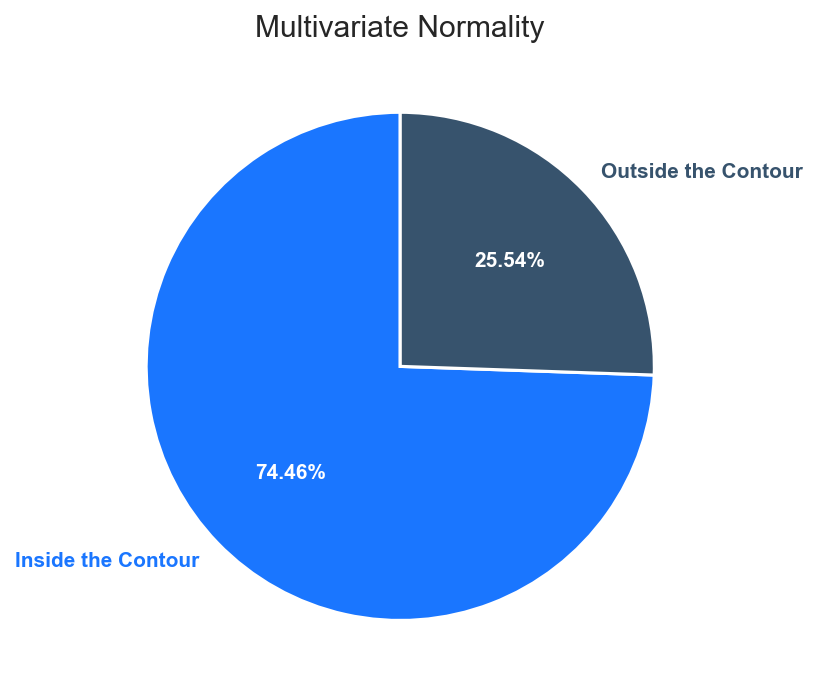

In [12]:
fig,ax = plt.subplots(dpi=150)

patches,texts,pcts = ax.pie(
    multivar_normal.Conclusion.value_counts().values,
    labels=multivar_normal.Conclusion.value_counts().index,
    startangle=90,
    colors=["#1a76ff","#37536d"],
    autopct="%.2f%%",
    wedgeprops={"linewidth":1.5,"edgecolor":"white"}
)
for index,patch in enumerate(patches):
    texts[index].set_color(patch.get_facecolor())

plt.setp(pcts,color="white",fontweight="bold")
plt.setp(texts,fontweight="bold")
ax.set_title("Multivariate Normality")

plt.show()

Pengukuran Kaiser-Meyer-Olkin (KMO) dan tes Bartlett umumnya digunakan dalam analisis faktor untuk menilai kesesuaian dataset untuk analisis factor. KMO adalah statistik yang mengevaluasi kesesuaian set data untuk analisis faktor dengan mengukur tingkat variansi umum antara variabel dalam dataset. Ini berkisar dari 0 sampai 1. Sementara itu, tes Bartlett adalah tes statistik yang menilai hipotesis nol bahwa semua variabel dalam kumpulan data tidak korelasi. Karena kedua ukuran KMO lebih besar dari 0,6 dan nilai p untuk tes Bartlett signifikan (p < 0,05), dataset kami cocok untuk analisis faktor.

In [13]:
print(f"KMO\t\t: {calculate_kmo(df_z)[-1]}")
print(f"Bartlett\t: {calculate_bartlett_sphericity(df_z)[-1]}")

KMO		: 0.6408932395421234
Bartlett	: 0.0


C:\Users\ASUS\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Kami akan menggunakan plot scree, yang merupakan representasi grafis dari eigenvalues variabel dalam analisis faktor, untuk menentukan jumlah faktor untuk diekstrak dari data. Berdasarkan plot, ada 5 faktor dengan eigenvalues yang lebih besar dari 1, yang berarti faktor-faktor ini dianggap signifikan dan dianggap untuk menjelaskan jumlah yang berarti, 70.37% untuk menjadi akurat, varians dalam data.

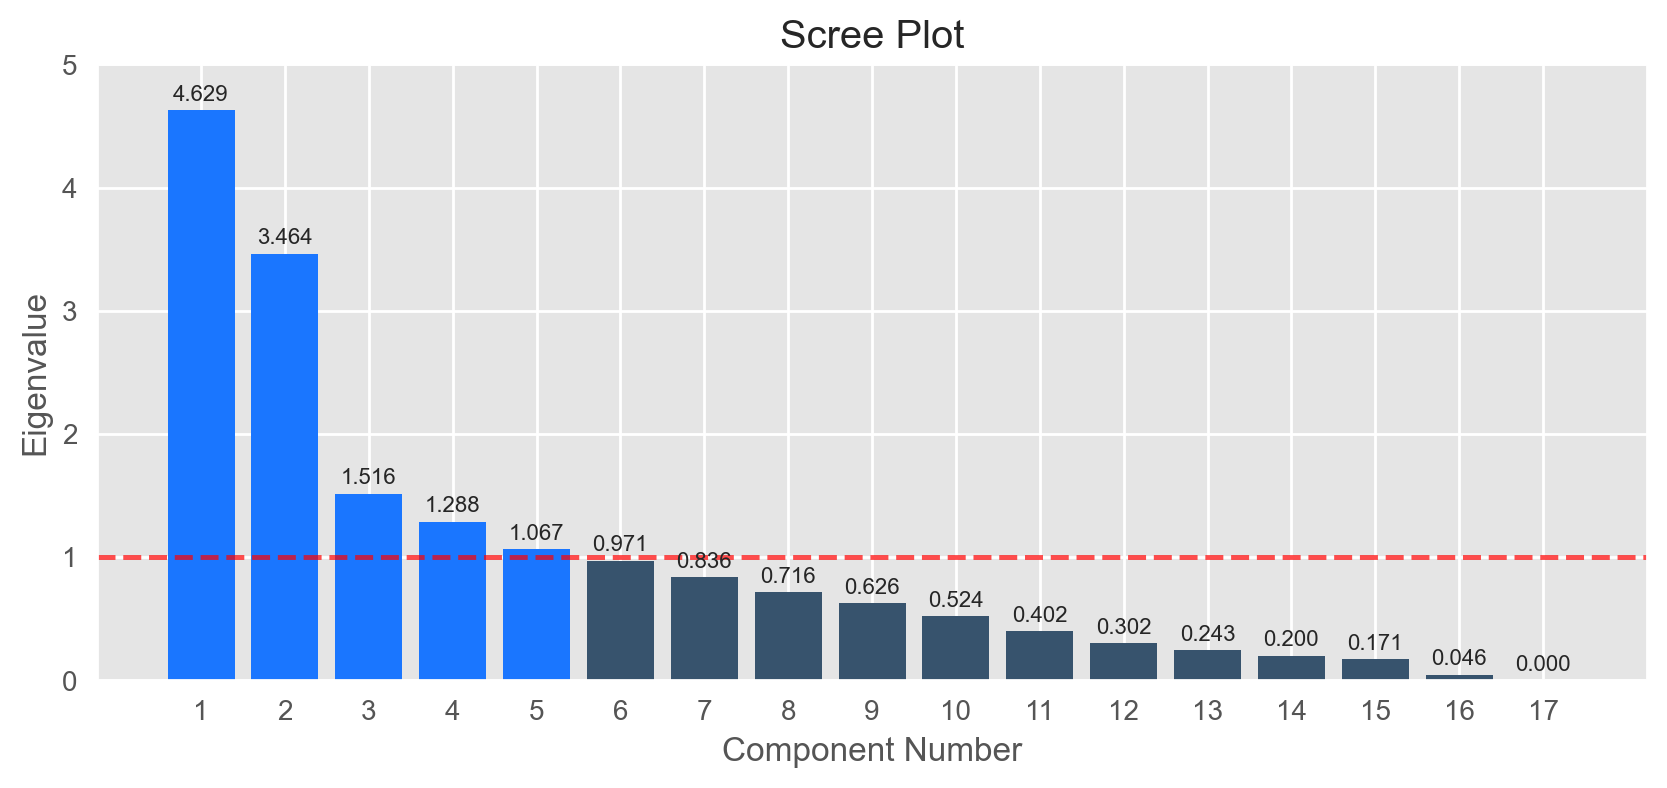

In [14]:
n = len(df_z.columns)
fa = FactorAnalyzer(rotation="varimax",method="principal")
fa.fit(df_z)

fig,ax = plt.subplots(figsize=(10,4),dpi=200)

bars = ax.bar(
    range(1,n + 1),
    fa.get_eigenvalues()[0],
    color=["#1a76ff" if eigen > 1 else "#37536d" for eigen in fa.get_eigenvalues()[0]]
)

for bars in ax.containers:
    ax.bar_label(bars,fmt="%.3f",fontsize=8,padding=2,fontweight=500)

ax.axhline(y=1,color="red",linestyle="--",alpha=0.7)
ax.set_title("Scree Plot")
ax.set_xticks(range(1,n + 1))
ax.set_xlabel("Component Number")
ax.set_ylabel("Eigenvalue")
ax.set_ylim(ymax=5)
plt.show()

In [15]:
total_variance_explained = pd.DataFrame({
    "Component":range(1,n + 1),
    "Eigenvalue":fa.get_eigenvalues()[0],
    "% of Variance":fa.get_eigenvalues()[0] / len(df_z.columns) * 100
}).set_index("Component")
total_variance_explained["Cumulative"] = total_variance_explained["% of Variance"].cumsum()

def highlight_rows(row):
    value = row.loc["Eigenvalue"]
    if value > 1:
        color = "#1a76ff"
    else:
        color = "#37536d"
    return ["background-color: {}".format(color) for r in row]

total_variance_explained.style.apply(highlight_rows,axis=1)

,Eigenvalue,% of Variance,Cumulative
Component,,,
1,4.629300,27.231177,27.231177
2,3.463632,20.374308,47.605485
3,1.516117,8.918334,56.523818
4,1.287513,7.573609,64.097427
5,1.067025,6.276618,70.374045
6,0.971174,5.712786,76.086831
7,0.835752,4.916188,81.003019
8,0.715825,4.210734,85.213753
9,0.625888,3.681697,88.895450


Create a factor analyzer model using 5 factors.

In [16]:
fa_5 = FactorAnalyzer(n_factors=5,rotation="varimax",method="principal")
fa_5.fit(df_z)

FactorAnalyzer(method='principal', n_factors=5, rotation='varimax',
               rotation_kwargs={})

Untuk membuat faktor lebih dapat ditafsirkan, matriks komponen berputar. Salah satu metode rotasi yang paling umum adalah rotasi varimax. Setelah matriks komponen berputar diperoleh, dapat digunakan untuk mengidentifikasi variabel mana yang paling kuat terkait dengan setiap faktor dan memahami struktur keseluruhan data dengan melihat beban komponen untuk setiap variabel. Variabel dengan beban tinggi pada faktor tertentu sangat terkait dengan faktor itu.

In [17]:
rotated_component_matrix = pd.DataFrame(
    data=fa_5.loadings_,
    columns=[f"Component {component + 1}" for component in range(fa_5.n_factors)],
    index=df_z.columns
)
rotated_component_matrix

,Component 1,Component 2,Component 3,Component 4,Component 5
balance,0.227475,0.523886,-0.060145,0.594524,0.255954
balance_frequency,0.049512,0.157904,0.223390,0.148993,0.762657
purchases,0.884665,-0.060941,0.299793,0.105016,-0.047183
oneoff_purchases,0.912430,-0.069261,0.042115,-0.007289,0.037106
installments_purchases,0.414613,-0.016886,0.631283,0.261577,-0.179850
cash_advance,0.065702,0.856693,-0.097051,0.120192,-0.075990
purchases_frequency,0.220248,-0.188748,0.848001,-0.118278,0.227714
oneoff_purchases_frequency,0.672939,-0.128112,0.159978,-0.216886,0.414639
purchases_installments_frequency,0.025414,-0.118729,0.933708,0.027648,0.056552
cash_advance_frequency,-0.056596,0.865555,-0.181987,-0.021120,0.174385


In [18]:
factors = []
for variable in rotated_component_matrix.index:
    for index,value in enumerate(rotated_component_matrix.loc[variable],start=1):
        if abs(value) == np.max(np.array(abs(rotated_component_matrix.loc[variable]))):
            factors.append(index)

factor_1,factor_2,factor_3,factor_4,factor_5 = ([] for _ in range(fa_5.n_factors))
for variable,factor in zip(rotated_component_matrix.index,factors):
    if factor == 1:
        factor_1.append(variable)
    elif factor == 2:
        factor_2.append(variable)
    elif factor == 3:
        factor_3.append(variable)
    elif factor == 4:
        factor_4.append(variable)
    else:
        factor_5.append(variable)

components = pd.DataFrame(
    data=[factor_1,factor_2,factor_3,factor_4,factor_5],
    index=[f"Component {component + 1}" for component in range(fa_5.n_factors)]
).T
components.replace([None]," ",inplace=True)
components

,Component 1,Component 2,Component 3,Component 4,Component 5
0,purchases,cash_advance,installments_purchases,balance,balance_frequency
1,oneoff_purchases,cash_advance_frequency,purchases_frequency,minimum_payments,prc_full_payment
2,oneoff_purchases_frequency,cash_advance_trx,purchases_installments_frequency,tenure,
3,purchases_trx,,,,
4,credit_limit,,,,
5,payments,,,,


Reduce the dimensions of our dataset into a subset of 5 dimensions using factor analysis.

In [19]:
df_fa = pd.DataFrame(data=fa_5.fit_transform(df_z),columns=[f"Component {i + 1}" for i in range(fa_5.n_factors)])
df_fa.head(10)

,Component 1,Component 2,Component 3,Component 4,Component 5
0,-0.468001,-0.806452,-0.800246,0.046945,-0.202331
1,-0.019107,1.169520,-0.788684,0.573086,-0.802249
2,0.809211,-0.786300,-0.606089,-0.284058,1.874243
3,-0.348487,-0.765665,-0.981168,0.129313,0.405370
4,-0.595084,-0.556173,0.640184,1.021097,0.057387
5,3.229177,-0.483759,0.843265,-1.093200,-0.147468
6,-0.883212,-0.469488,1.140295,0.377778,0.549957
7,-0.031964,-0.663676,-0.543344,0.417869,0.326966
8,0.619593,-0.785664,-1.326611,0.335996,-1.044187
9,-0.911578,-0.512975,1.329118,0.711471,0.311871


# Model Definition & Training

Metode pergelangan tangan dan metode siluet adalah dua pendekatan yang berbeda yang dapat digunakan untuk menentukan jumlah cluster yang optimal dalam analisis k-means cluster. Metode elbow didasarkan pada jumlah jarak persegi dalam cluster (WCSS), sedangkan metode siluet didasari pada koefisien siluet, yang mengukur kesamaan sebuah pengamatan dengan clusternya sendiri dibandingkan dengan clusters lainnya. Kita dapat menggunakan perpustakaan * yellowbrick* untuk membuat visualisasi.

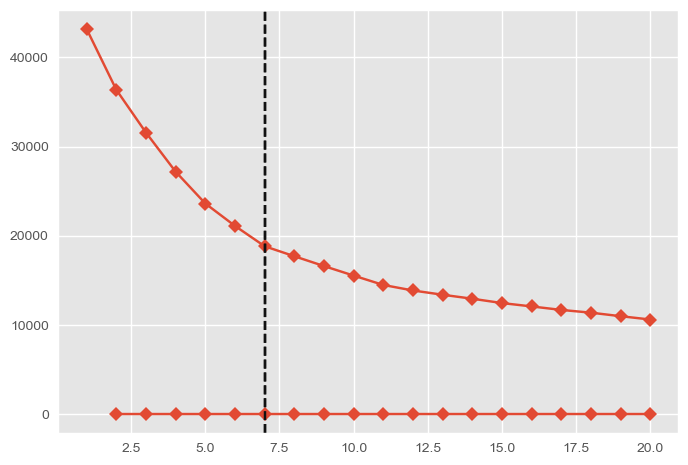

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import numpy as np
import pandas as pd

# Misalkan df_fa adalah DataFrame yang sesuai dengan data Anda

random_state = 42
start = 1
end = 20

scores, elbows_indexes, elbows_scores, methods = [], [], [], ["distortion", "silhouette"]

for method in methods:
    if method == "silhouette":
        start = 2
    
    kmeans_model = KMeans(init="k-means++", random_state=random_state, n_init=10)
    visualizer = KElbowVisualizer(kmeans_model, k=(start, end + 1), metric=method, timings=False)
    visualizer.fit(df_fa)
    scores.append(visualizer.k_scores_)
    elbows_indexes.append(visualizer.elbow_value_)
    elbows_scores.append(visualizer.elbow_score_)



This step is optional. Since the visualization created by the *yellowbrick* library lacks customization, we can recreate the visualization using the *matplotlib* library to make it better.

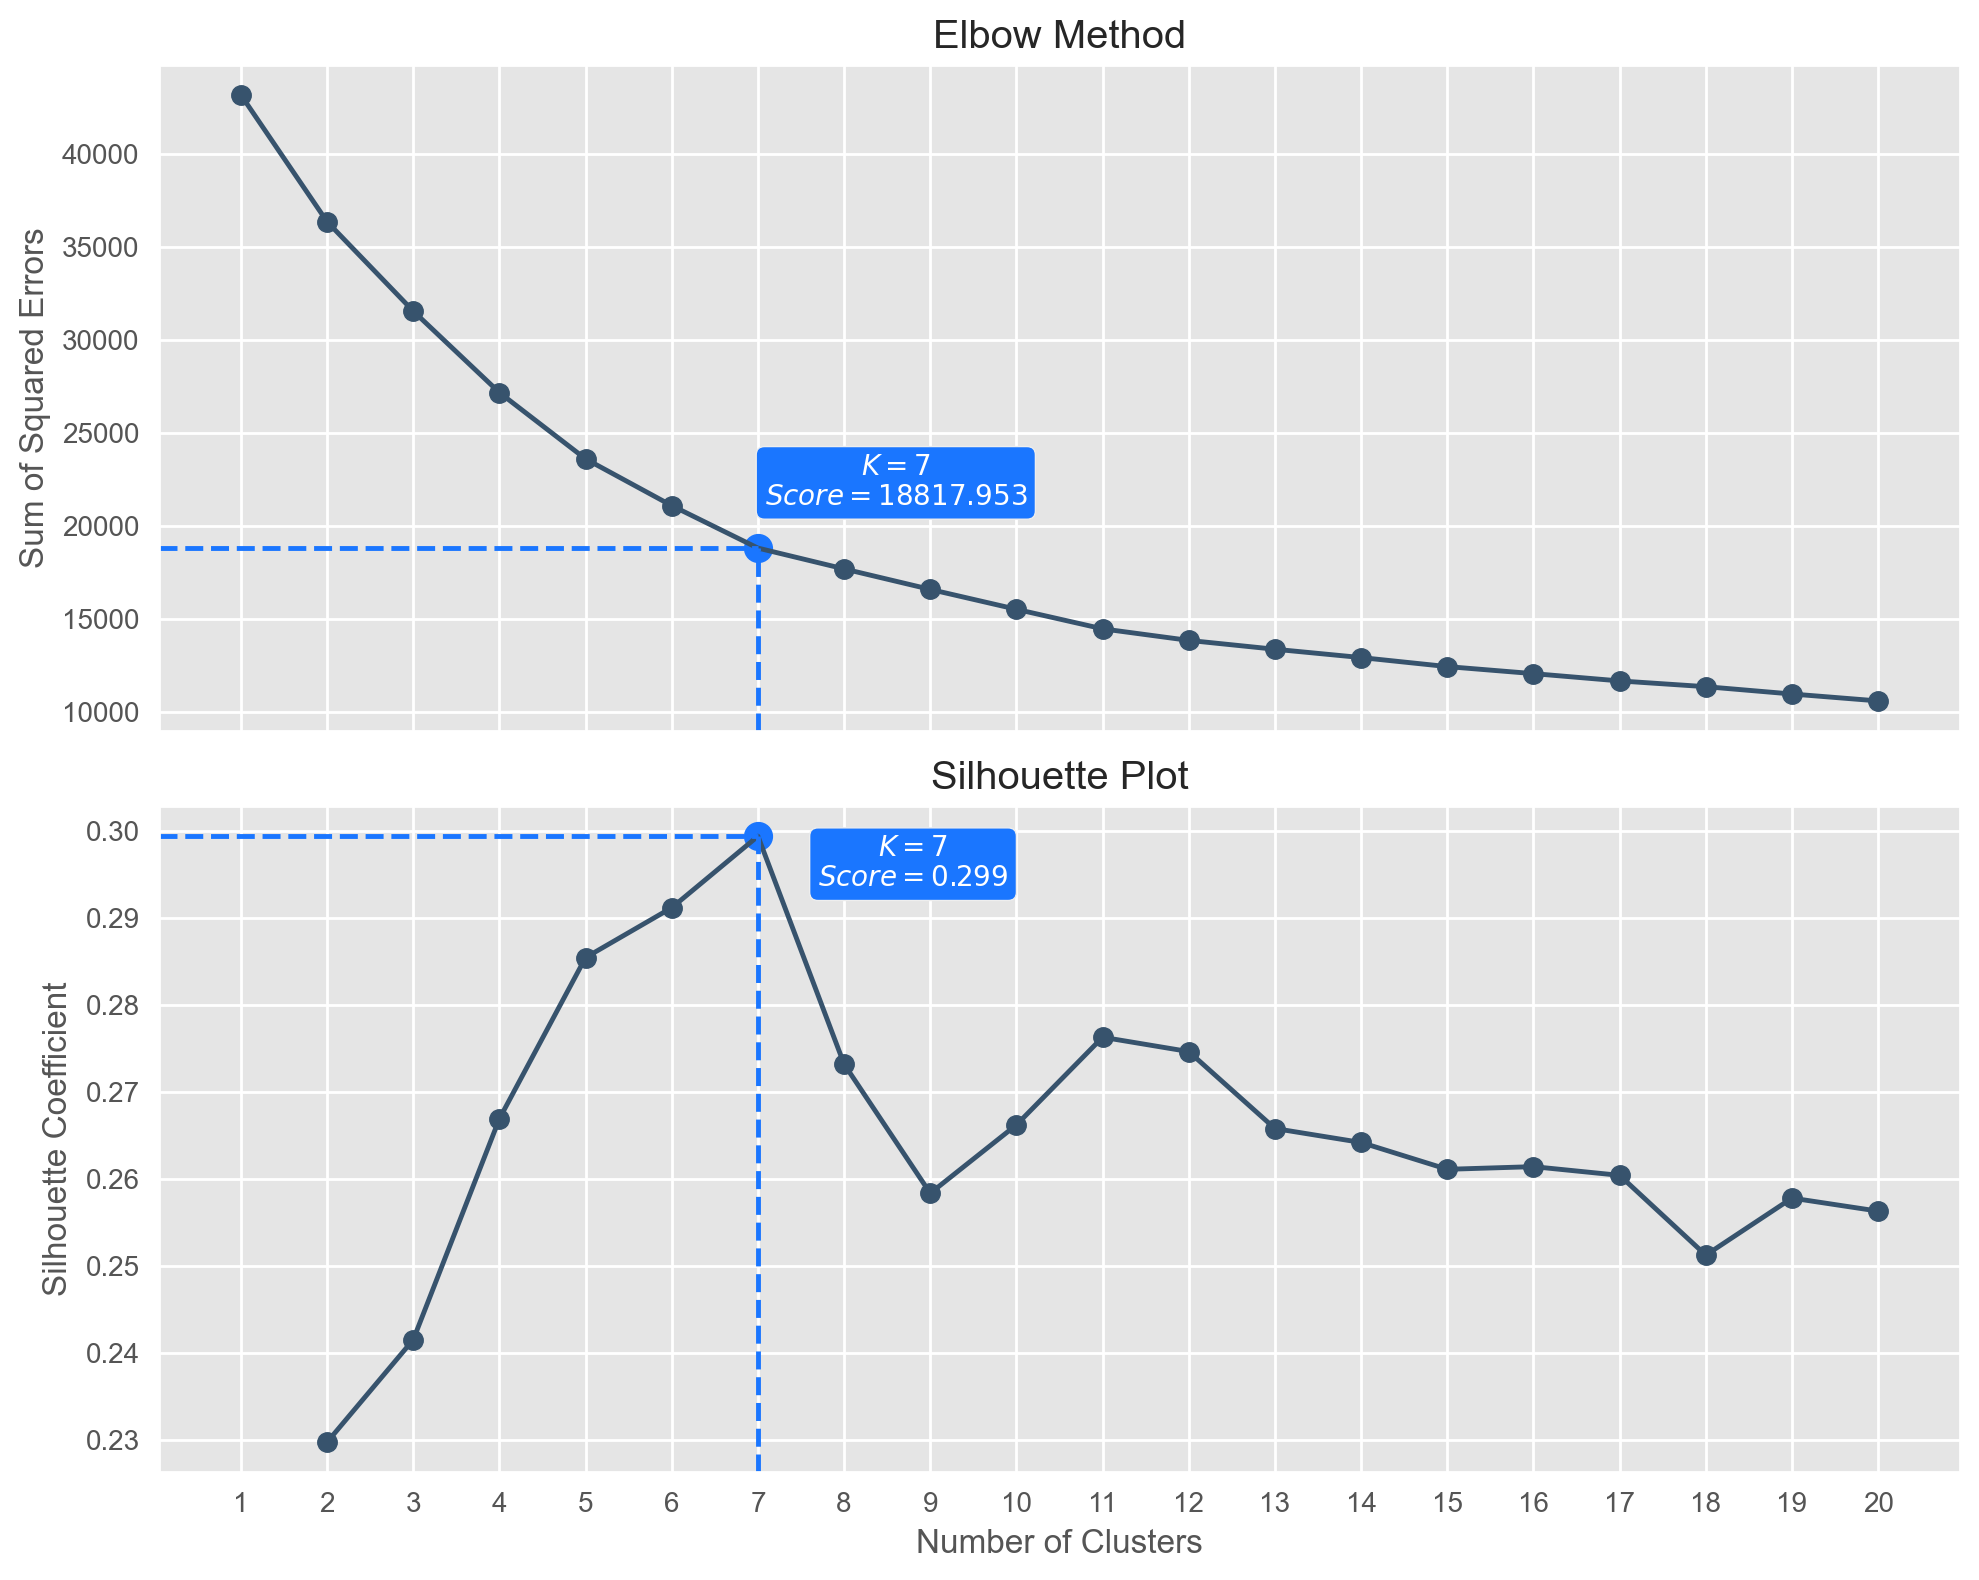

In [21]:
start = 1
end = 20

fig,ax = plt.subplots(2,1,figsize=(10,8),dpi=200,sharex=True)

# Elbow Method
ax[0].plot(range(start,end + 1),scores[0],color="#37536d")
ax[0].scatter(range(start,end + 1),scores[0],color="#37536d")
ax[0].scatter(elbows_indexes[0],elbows_scores[0],color="#1a76ff",s=100)
ax[0].set_xticks(range(start,end + 1))

xmin,xmax = ax[0].get_xlim()
ymin,ymax = ax[0].get_ylim()

ax[0].plot((xmin,elbows_indexes[0]),(elbows_scores[0],elbows_scores[0]),color="#1a76ff",linestyle="--")
ax[0].plot((elbows_indexes[0],elbows_indexes[0]),(ymin,elbows_scores[0]),color="#1a76ff",linestyle="--")
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
ax[0].set_title("Elbow Method")
ax[0].set_ylabel("Sum of Squared Errors")
ax[0].text(
    x=elbows_indexes[0] + 1.6,
    y=elbows_scores[0] + 2_000,
    horizontalalignment="center",
    verticalalignment="bottom",
    s=f"$ K = {elbows_indexes[0]} $\n$ Score = {round(elbows_scores[0],3)} $",
    color="white",
    fontweight="bold",
    bbox=dict(x=0,facecolor="#1a76ff",boxstyle="round"),
)

# Silhouette Plot
ax[1].plot(range(start + 1,end + 1),scores[1],color="#37536d")
ax[1].scatter(range(start + 1,end + 1),scores[1],color="#37536d")
ax[1].scatter(elbows_indexes[1],elbows_scores[1],color="#1a76ff",s=100)
ax[1].set_xticks(range(start,end + 1))

xmin,xmax = ax[1].get_xlim()
ymin,ymax = ax[1].get_ylim()

ax[1].plot((xmin,elbows_indexes[1]),(elbows_scores[1],elbows_scores[1]),color="#1a76ff",linestyle="--")
ax[1].plot((elbows_indexes[1],elbows_indexes[1]),(ymin,elbows_scores[1]),color="#1a76ff",linestyle="--")
ax[1].set_xlim(xmin,xmax)
ax[1].set_ylim(ymin,ymax)
ax[1].set_title("Silhouette Plot")
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("Silhouette Coefficient")
ax[1].text(
    x=elbows_indexes[1] + 1.8,
    y=elbows_scores[1],
    horizontalalignment="center",
    verticalalignment="top",
    s=f"$ K = {elbows_indexes[1]} $\n$ Score = {round(elbows_scores[1],3)} $",
    color="white",
    fontweight="bold",
    bbox=dict(x=0,facecolor="#1a76ff",boxstyle="round")
)

plt.tight_layout()
plt.show()

Kita dapat melihat plot siluet yang lebih terperinci di bawah ini, di mana setiap objek diwakili oleh garis horisontal dan skor siluet dari obyek diwakilkan oleh posisi garis di sepanjang sumbu x. X-axis bervariasi dari -1 hingga 1 dengan skor 1 yang menunjukkan bahwa objek ini sangat mirip dengan objek lain dalam clusternya sendiri dan sangat berbeda dengan objek di cluster lainnya. Plot siluet juga mencakup garis vertikal dengan skor siluet rata-rata untuk semua objek dalam model. Garis ini berfungsi sebagai titik referensi untuk menafsirkan skor siluet objek individu. Jika skor siluet sebagian besar objek berada di atas garis rata-rata, itu menunjukkan bahwa cluster terpisah dengan baik dan model telah menghasilkan hasil yang baik.

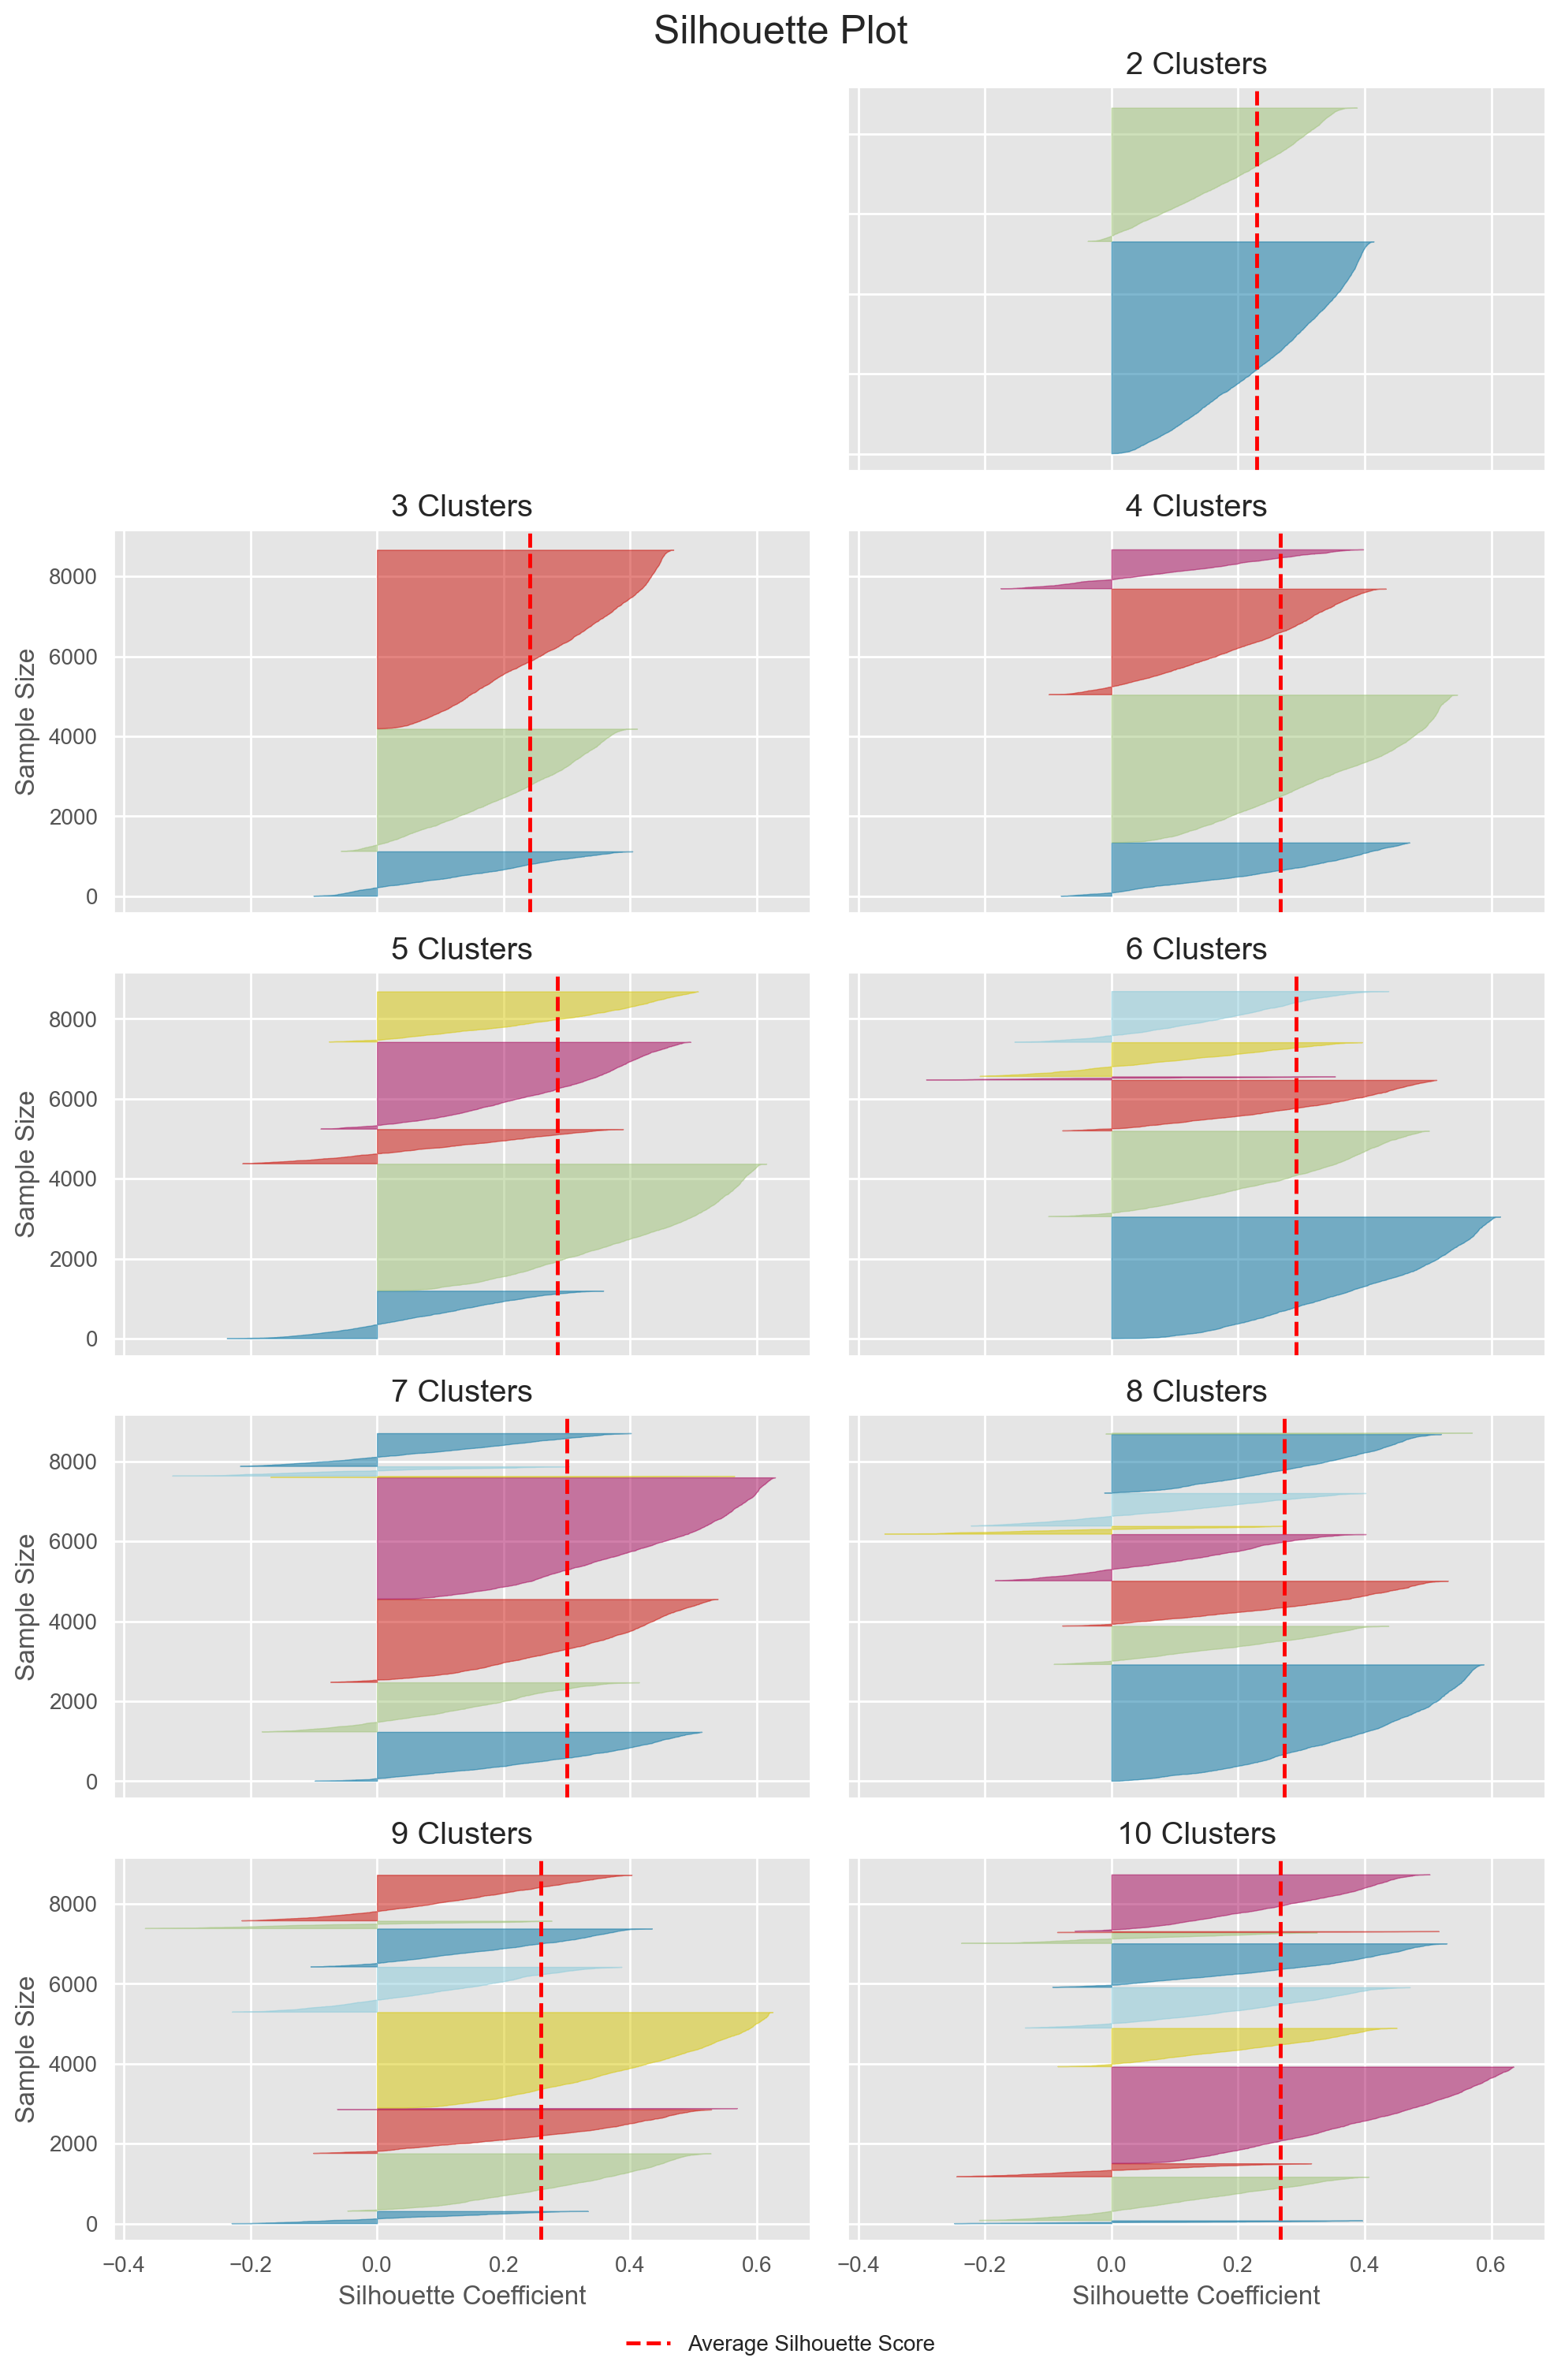

In [22]:
start = 2
end = 10

nrow,ncol = 5,2
fig,ax = plt.subplots(nrow,ncol,figsize=(10,15),dpi=200,sharex=True,sharey=True)

for k in range(start,end + 2):
    q,mod = divmod(k,2)

    if ((q - 1) == 0) & (mod == 0):
        pass
    else:
        k -= 1
        kmeans_model = KMeans(n_clusters=k,init="k-means++",random_state=random_state)
        visualizer = SilhouetteVisualizer(kmeans_model,colors="yellowbrick",ax=ax[q - 1][mod])
        visualizer.fit(df_fa)

        ax[q - 1][mod].set_title(f"{k} Clusters")
        
        if mod == 0:
            ax[q - 1][mod].set_ylabel("Sample Size")
        if (q - 1) == (nrow - 1):
            ax[q - 1][mod].set_xlabel("Silhouette Coefficient")

for axes in ax.flat:
    if not bool(axes.has_data()):
        fig.delaxes(axes)
    
handles,labels = ax[q - 1][mod].get_legend_handles_labels()
fig.legend(handles,labels,loc="center",bbox_to_anchor=(0.5,-0.005))

plt.suptitle("Silhouette Plot",fontsize=18)
plt.tight_layout()
plt.show()

Based on the plots above, we know that the optimal number of clusters is 7. Thus, let's create a k-means model using 7 clusters.

In [23]:
kmeans_model = KMeans(n_clusters=7,init="k-means++",random_state=random_state)
kmeans_model.fit(df_fa)

KMeans(n_clusters=7, random_state=42)

Dalam k-means cluster algorithm, pusat cluster adalah titik yang menentukan pusat setiap cluster. Titik-titik ini dipilih dengan cara yang meminimalkan jarak antara titik data di cluster dan pusat cluster. Algoritma k-means dimulai dengan memilih seperangkat pusat cluster awal, yang dapat dipilih secara acak atau ditentukan oleh pengguna. Algoritma kemudian secara iteratif memperbarui pusat-pusat cluster dengan mengalokasikan setiap titik data ke pusat cluster terdekat, dan kemudian menghitung kembali pusat kluster sebagai rata-rata titik-titik data di dalam cluster. Proses ini diulang sampai konvergensi, yaitu ketika pusat cluster berhenti berubah atau perbedaan antara jumlah persegi dalam cluster antara dua iterasi berturut-turut berada di bawah ambang batas tertentu.

In [24]:
clusters = []
for iteration in range(1,kmeans_model.n_iter_ + 1):
    temp_model = KMeans(n_clusters=7,init="k-means++",random_state=random_state,max_iter=iteration)
    temp_model.fit(df_fa)
    clusters.append(np.transpose(temp_model.cluster_centers_))

first_index = sum([[f"Iteration {iteration}" for component in range(fa_5.n_factors)] for iteration in range(1,kmeans_model.n_iter_ + 1)],[])
second_index = [f"Component {component + 1}" for component in range(fa_5.n_factors)] * kmeans_model.n_iter_
multi_index = pd.MultiIndex.from_arrays([first_index,second_index])

iteration_history = pd.DataFrame(
    data=np.ravel(clusters).reshape(-1,kmeans_model.n_clusters),
    columns=[f"Cluster {cluster}" for cluster in range(7)],
    index=multi_index
)
iteration_history

Cluster 0  Cluster 1  Cluster 2  Cluster 3  \
Iteration 1  Component 1  -0.265150   0.122292   0.699596  -0.228136   
             Component 2  -0.171637   2.485550  -0.563555  -0.163389   
             Component 3   0.255228  -0.194595  -0.381062   1.206700   
             Component 4   2.746243   0.015496  -0.325695  -0.054012   
             Component 5  -0.372636  -0.046181   0.920570   0.282551   
...                             ...        ...        ...        ...   
Iteration 37 Component 1  -0.083638   1.250813  -0.501424  -0.233754   
             Component 2  -0.391159  -0.457259  -0.249096  -0.141314   
             Component 3  -0.519023   0.252939   1.196861  -0.753467   
             Component 4  -0.278889  -0.512846  -0.142431   0.212179   
             Component 5  -1.720608   0.919166   0.008818   0.323483   

                          Cluster 4  Cluster 5  Cluster 6  
Iteration 1  Component 1   7.827630  -0.263067  -0.149717  
             Component 2  -0.044460   0.016953  -0.438968  
             Component 3   0.833393  -0.833462  -0.104043  
             Component 4   1.141061   0.151003  -0.371046  
             Component 5  -2.106617   0.155652  -1.541347  
...                             ...        ...        ...  
Iteration 37 Component 1  10.681778   0.325852  -0.021913  
             Component 2   0.060157   0.355349   2.316326  
             Component 3  -0.294003   1.133088  -0.157054  
             Component 4   0.860399   3.368168  -0.217823  
             Component 5  -2.803904  -0.320052   0.142241  

[185 rows x 7 columns]

In [25]:
final_cluster_centers = pd.DataFrame(
    data=kmeans_model.cluster_centers_,
    columns=df_fa.columns,
    index=[f"Cluster {cluster}" for cluster in range(kmeans_model.n_clusters)]
).T
final_cluster_centers

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
Component 1,-0.083638,1.250813,-0.501424,-0.233754,10.681778,0.325852,-0.021913
Component 2,-0.391159,-0.457259,-0.249096,-0.141314,0.060157,0.355349,2.316326
Component 3,-0.519023,0.252939,1.196861,-0.753467,-0.294003,1.133088,-0.157054
Component 4,-0.278889,-0.512846,-0.142431,0.212179,0.860399,3.368168,-0.217823
Component 5,-1.720608,0.919166,0.008818,0.323483,-2.803904,-0.320052,0.142241


Assign data points to clusters and calculate the distance between the data points and the cluster centers.

In [26]:
df_labeled = df_fa.copy()
df_labeled["Cluster"] = kmeans_model.labels_
df_labeled["Distance"] = np.min(kmeans_model.transform(df_fa),axis=1)
df_labeled.head(10)

,Component 1,Component 2,Component 3,Component 4,Component 5,Cluster,Distance
0,-0.468001,-0.806452,-0.800246,0.046945,-0.202331,3,0.896243
1,-0.019107,1.169520,-0.788684,0.573086,-0.802249,3,1.778518
2,0.809211,-0.786300,-0.606089,-0.284058,1.874243,1,1.416235
3,-0.348487,-0.765665,-0.981168,0.129313,0.405370,3,0.684396
4,-0.595084,-0.556173,0.640184,1.021097,0.057387,2,1.330081
5,3.229177,-0.483759,0.843265,-1.093200,-0.147468,1,2.395335
6,-0.883212,-0.469488,1.140295,0.377778,0.549957,2,0.872344
7,-0.031964,-0.663676,-0.543344,0.417869,0.326966,3,0.632498
8,0.619593,-0.785664,-1.326611,0.335996,-1.044187,0,1.462189
9,-0.911578,-0.512975,1.329118,0.711471,0.311871,2,1.037468


Visualize the number of data points in each cluster.

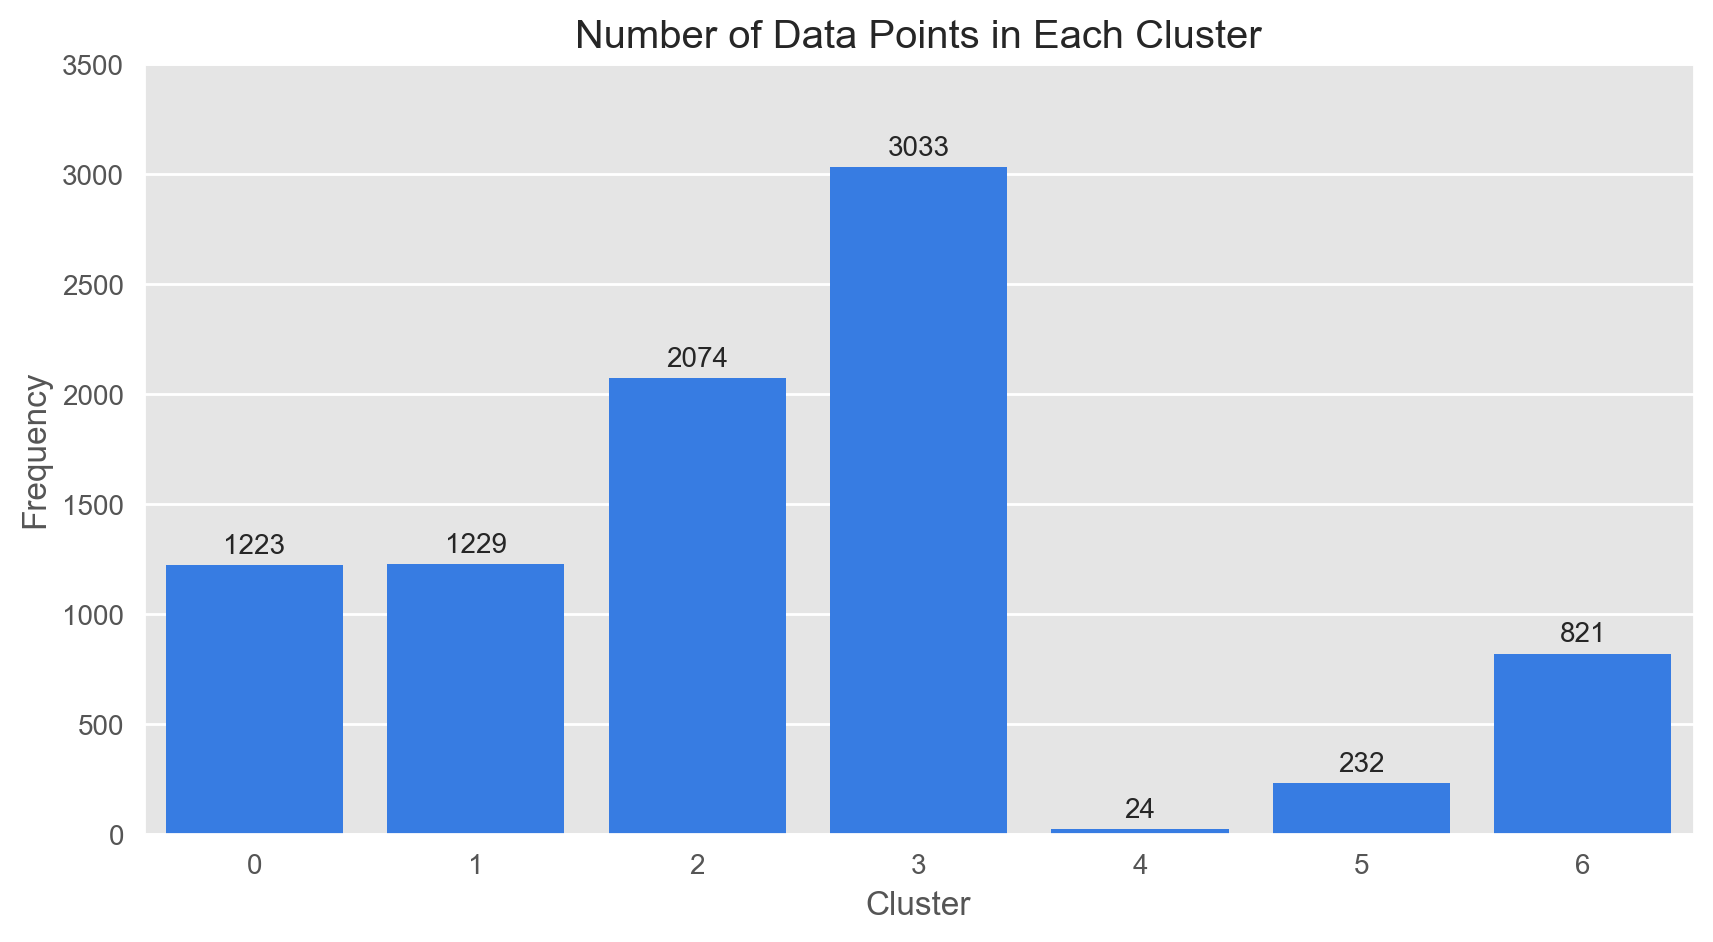

In [27]:
fig,ax = plt.subplots(figsize=(10,5),dpi=200)

sns.countplot(data=df_labeled,x="Cluster",color="#1a76ff")
ax.set_title("Number of Data Points in Each Cluster")
ax.set_ylim(ymax=3500)
ax.set_ylabel("Frequency")

for bars in ax.containers:
    ax.bar_label(bars,fmt="%.0f",padding=2,fontweight=500)

plt.show()

# Model Evaluation

Penting untuk dicatat bahwa teknik pembelajaran mesin yang tidak diawasi, seperti k-means clustering, tidak memiliki jawaban "benar" atau "salah". Tidak seperti teknik pembelajaran yang diawasi, yang dilatih pada data yang diberi label dan dapat dievaluasi menggunakan metrik seperti akurasi, teknik pembelajaran tanpa pengawasan tidak memiliki label kebenaran dasar untuk membandingkan prediksi mereka.

Dalam tabel ANOVA untuk k-means cluster, nilai F dan p-value digunakan untuk menentukan apakah perbedaan antara rata-rata dari cluster statistically signifikan. Nilai F adalah rasio rata-rata persegi antara kelompok (yaitu, kelompok-kelompok) dengan persegi tengah dalam kelompok, sedangkan nilai p adalah probabilitas bahwa perbedaan antara rata-ratanya dari kelompok adalah karena kebetulan. Karena nilai F untuk cluster sangat besar dan nilai p untuk clusters kecil (biasanya kurang dari 0,05), itu menunjukkan bahwa ada perbedaan yang signifikan secara statistik antara rata-rata cluster. Ini dapat menunjukkan bahwa cluster berbeda dan berarti.

In [28]:
stats,p_values = [],[]
for feature in df_fa.columns:
    groups = [df_fa[feature][kmeans_model.labels_ == label] for label in range(kmeans_model.n_clusters)]
    stat,p_value = f_oneway(*groups)
    stats.append(stat)
    p_values.append(p_value)

anova = pd.DataFrame(
    data=[stats,p_values],
    columns=[f"Component {component + 1}" for component in range(fa_5.n_factors)],
    index=["F","P-Value"]
).T
anova

,F,P-Value
Component 1,2378.660069,0.0
Component 2,2042.480729,0.0
Component 3,2425.100148,0.0
Component 4,883.174984,0.0
Component 5,2182.425628,0.0


Visualisasikan kluster titik data berdasarkan fitur mereka menggunakan plot scatter. Untuk mengurangi biaya komputasi, kita hanya akan menggunakan komponen 1.

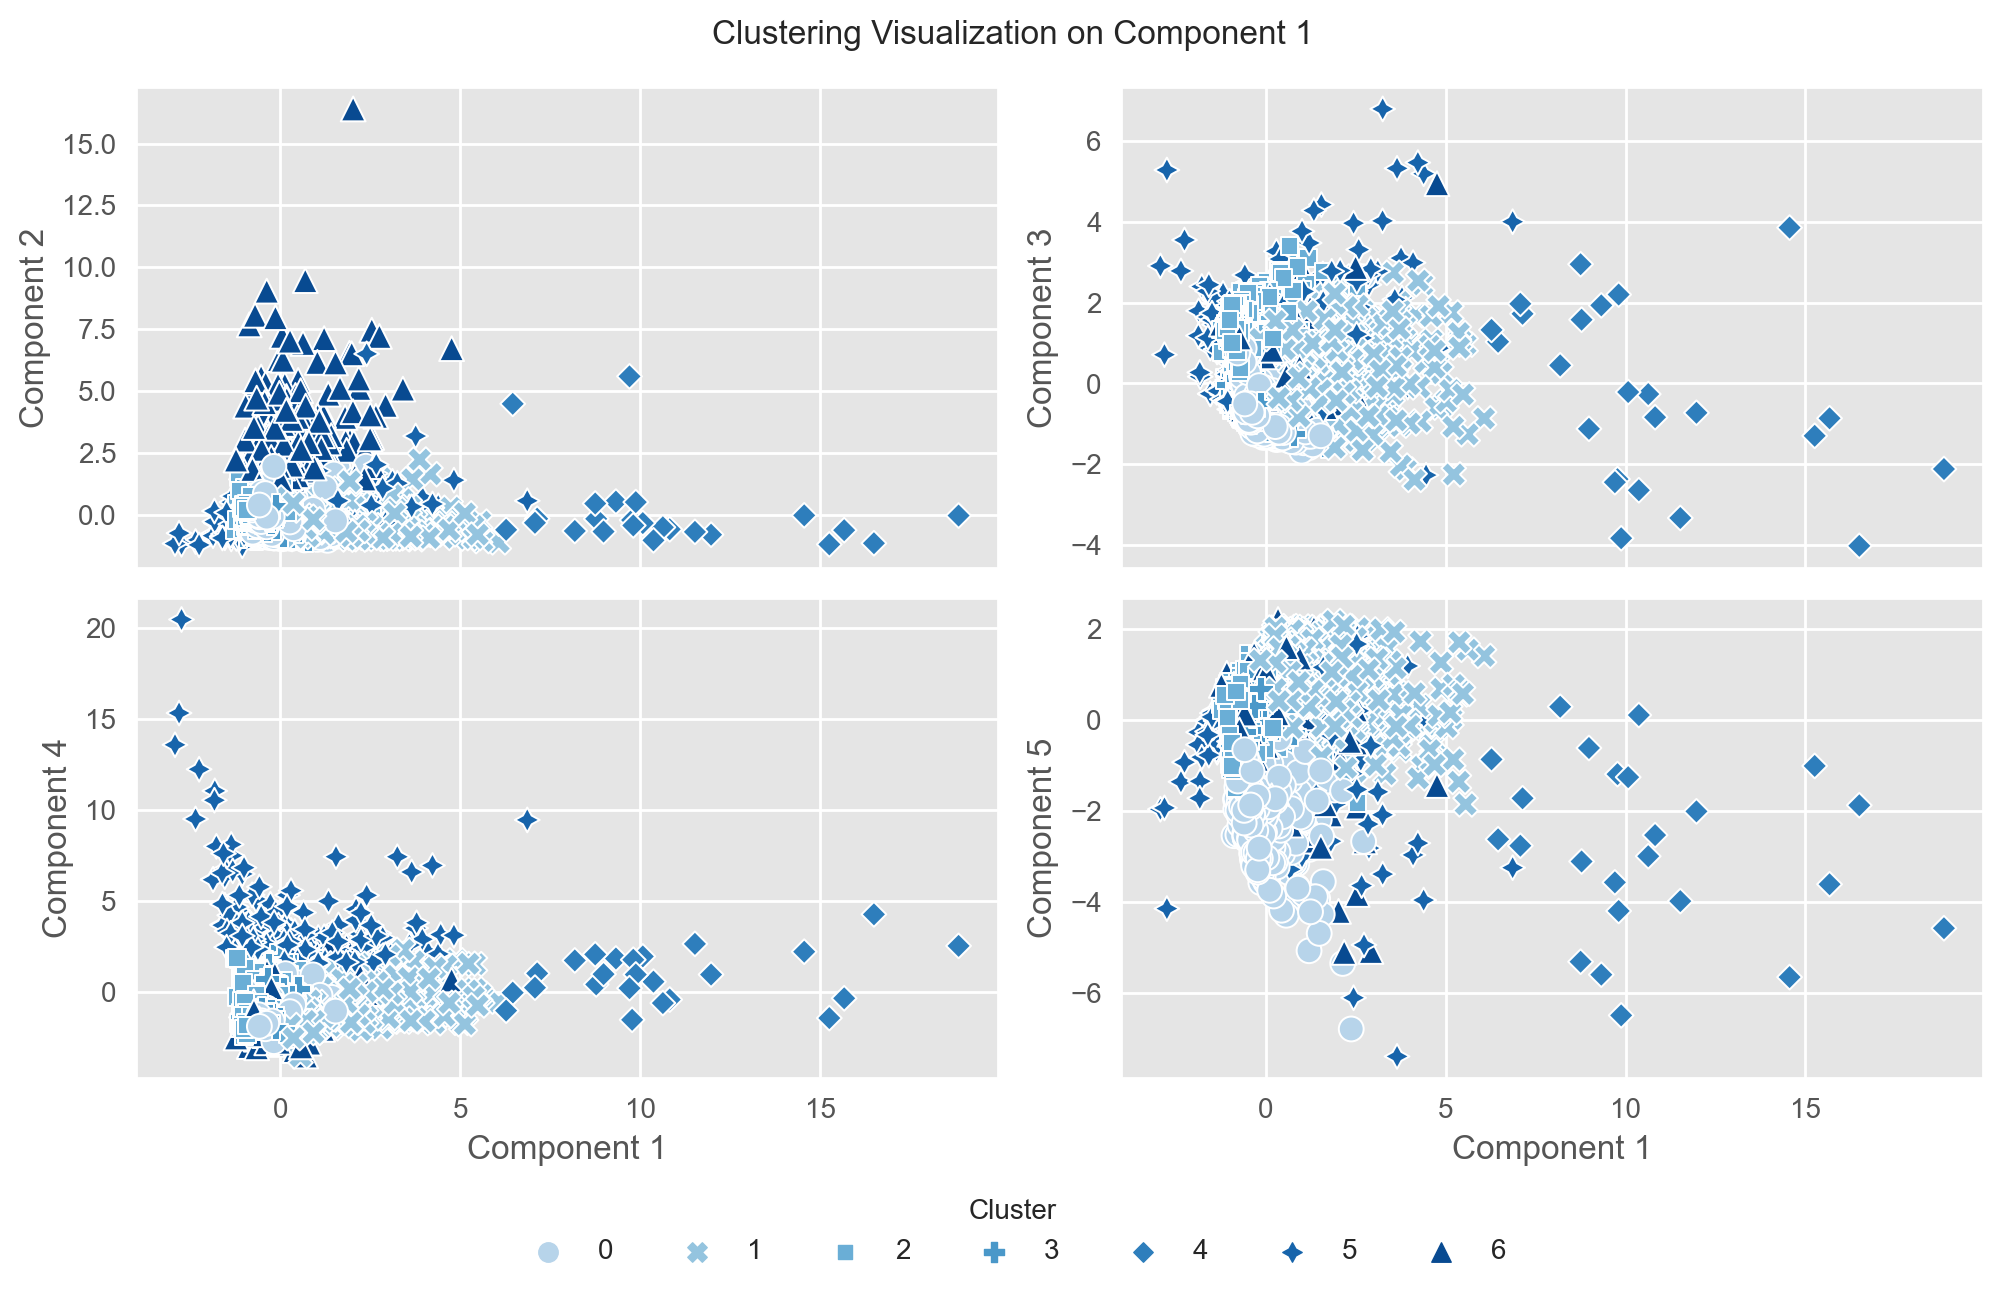

In [29]:
fig,ax = plt.subplots(2,2,figsize=(10,6),dpi=200,sharex=True)

for feature,length in zip(df_fa.columns[1:],range(len(df_fa.columns[1:]))):
    q,mod = divmod(length,2)
    sns.scatterplot(
        data=df_labeled,
        x="Component 1",
        y=feature,
        ax=ax[q][mod],
        hue="Cluster",
        style="Cluster",
        s=80,
        palette=sns.color_palette("Blues",n_colors=9)[2:],
    )
    ax[q][mod].get_legend().remove()

handles,labels = ax[q][mod].get_legend_handles_labels()
fig.legend(handles,labels,bbox_to_anchor=(0.5,-0.03),loc="center",ncol=kmeans_model.n_clusters,title="Cluster")

plt.suptitle("Clustering Visualization on Component 1")
plt.tight_layout()
plt.show()

Save the models for deployment and future use.

In [30]:
models = [fa_5,kmeans_model]
names = ["factor_analyze","kmeans_clustering"]
extension = "pkl"

for model,name in zip(models,names):
    with open(f"{name}.{extension}","wb") as files:
        dump(model,files)
    print(f"{name}.{extension} has been downloaded")

factor_analyze.pkl has been downloaded
kmeans_clustering.pkl has been downloaded


# Conclusion

Setelah melakukan analisis faktor dan k-means cluster pada dataset pelanggan kartu kredit, kami dapat mengidentifikasi 7 cluster yang berbeda dari pengguna kartu kredit berdasarkan pola pengeluaran dan kebiasaan pembayaran mereka. Temuan ini menunjukkan bahwa pelanggan kartu kredit dapat secara efektif dibagi berdasarkan perilaku pengeluaran dan pembayaran mereka, dan bahwa cluster ini mungkin berguna untuk upaya pemasaran dan penilaian risiko yang ditargetkan. Analisis lebih lanjut mungkin diperlukan untuk sepenuhnya memahami karakteristik dan kebutuhan masing-masing cluster, tetapi hasil penelitian ini memberikan dasar yang kuat untuk penelitian lebih lanjut di bidang ini.